# Install and Import Libraries


In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

# Implement Random Forest

In [2]:
class RandomForestFromScratch:
    def __init__(self, n_estimators=10, max_depth=None, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            # Create a bootstrap sample
            X_sample, y_sample = self.bootstrap_sample(X, y)

            # Randomly select features if max_features is specified
            if self.max_features:
                feature_indices = np.random.choice(
                    X.shape[1], self.max_features, replace=False
                )
                X_sample = X_sample[:, feature_indices]
            else:
                feature_indices = np.arange(X.shape[1])

            # Train a decision tree
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append((tree, feature_indices))

    def predict(self, X):
        # Aggregate predictions from all trees
        tree_predictions = []
        for tree, feature_indices in self.trees:
            tree_predictions.append(tree.predict(X[:, feature_indices]))

        # Transpose and vote for majority class
        tree_predictions = np.array(tree_predictions).T
        return np.array([Counter(row).most_common(1)[0][0] for row in tree_predictions])


In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [4]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Train the custom random forest
rf = RandomForestFromScratch(n_estimators=20, max_depth=5, max_features=5)
rf.fit(X_train, y_train)

In [6]:
# Predict and evaluate
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [7]:
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.9385714285714286
Test Accuracy: 0.8866666666666667


# Confusion Matrix

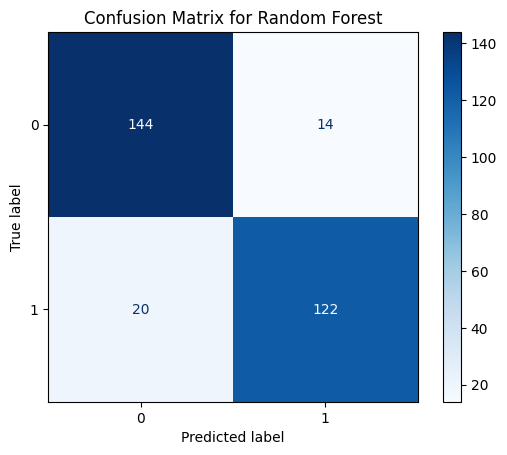

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()


# Predictions

In [9]:
# Save predictions
import pandas as pd

predictions_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_test
})
predictions_df.to_csv("random_forest_predictions.csv", index=False)

# Download the file
from google.colab import files
files.download("random_forest_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>